# VIOLENCIA DE GÉNERO EN ARGENTINA

## 1) INTRODUCCIÓN 
### CONTEXTO EMPRESARIAL
A lo largo de los años, la situación vulnerable de la muejer en Argentna se está haciendo visible. Por lo que, exponer la cantidad de casos y sus efectos a toda la sociadas, contribuye a la visibilizacion de las mujeres que han sufrido y las que continuarán sufirendo a causa de la desgualdad de género. Además, permitiran avanzar pasos transcendentales en materia de políticas públicas en favor de la igualdad y contra las violencias de género. Generando acciones de corto, mediano y largo plazo sustentadas para la prevención, asistencia integral y protección de aquellas mujeres que atraviesan estas situaciones de violencia. Haciendo hincapie en aquellas. Por lo que, es muy importante analizar que edades son la que mayor cantidad de casos hay y en que provincias. La informacion obtenida corresponde a aquellas comunicaciones recibdad por la Línea 144, en donde las personas que se comunican acceden a dejar sus datos para un adecuado abordaje y seguimiento. Los registros corresponden a tres sedes: Provincia de Buenos Aires, CABA y la sede de gestión nacional. Las preguntas a responder son: - En que provincias se producen más casos? - Cuales son las edades en las que se produce más violencia?

### CONTEXTO ANALÍTICO
Los datos ya se han recopilado y están en uso:
1. El archivo ¨ViolenciaGenero2.0.xlsx" que contiene el historial de los casos de violencia de género en la Argentina desde el 2020.
2. El archivo "HabitantesProvincia.xlsx" que contiene la cantidad de habitantes por provincia que se determinó en el Censo 2022.


### OBJETIVOS 
En este caso, se busca realizar un análisis estadístico y su consecuente compresión de los valores con el fin de determinar las provincias y edades más afectadas.Y, finalmente, crear un modelo para determinar los casos más probables por provincia, edad y vínculo con el agresor y, entonces, predecir los futuros casos y tipos de violencia. 


Por lo tanto, se procederá de la siguiente manera: (1) se analizará los datos actuales y se evaluará las deficiencias; (2)extraer los datos de estas fuentes y realizar una limpieza de datos, EDA e ingeniería de características y (3) crear un modelo predictivo.

## 2) ANÁLISIS DE DATA EXISTENTE
Antes de sumerginos en cualquier proyecto de ciencia de datos, siempre se debe evaluar los datos actuales para comprender que piezas de informacion podrían faltar. En algunos caso, no tendrá datos y tendrá que empezar de cero. En este caso, tenemos dos fuentes de datos diferentes, por lo que debemos analizar cada una de ellas individualmente y todas como un todo para averiguar como exactamente debemos complementarlas. En cada etapa, debemos tener en cuanta nuestro objetivo predecir futuros casos. Es decir, que debemos pensar la siguiente pregunta ¨Que información será útil pare predecir los futuros casos de violencia?¨

##### 2)1: IMPORTAMOS LIBRERIAS Y PAQUETES NECESARIAS

In [1]:
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import chart_studio.plotly     as py
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2
import os

##### 2)2. IMPORTAMOS LA BASE DE DATOS QUE SE ENCUENTRA EN UN ARCHIVO EXCEL

In [2]:
bd=pd.read_excel(r'C:\Users\garro\OneDrive\Escritorio\DATA SCIENCE\TRABAJO PRACTICO\ViolenciaGenero2.0.xlsx', sheet_name='casos')
bd2=pd.read_excel(r'C:\Users\garro\OneDrive\Escritorio\DATA SCIENCE\TRABAJO PRACTICO\HabitantesProvincia.xlsx', sheet_name='cantidad')

##### 2) 3. VERFICAMOS SI SE REALIZÓ LA CARGA A PARTIR DE M0STRAR LOS PRIMEROS CINCO DATOS

In [3]:
bd.head()

,FECHA,PROVINCIA,GENERO_PERSONA_SIT_VIOLENCIA,EDAD,PAIS_NACIMIENTO,TIPO_VIOLENCIA_FISICA,TIPO_VIOLENCIA_PSICOLOGICA,TIPO_VIOLENCIA_SEXUAL,TIPO_VIOLENCIA_ECONOMICA,TIPO_VIOLENCIA_SIMBOLICA,TIPO_VIOLENCIA_DOMESTICA,TIPO_VIOLENCIA_INSTITUCIONAL,TIPO_VIOLENCIA_LABORAL,TIPO_VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA,TIPO_VIOLENCIA_OBSTETRICA,TIPO_VIOLENCIA_MEDIATICA,TIPO_VIOLENCIA_OTRAS,VINCULO_PERSONA_AGRESORA,GENERO_AGRESOR,CASO
0,2020-01-01,Tucumán,Mujer,NaN,NaN,1,1,0,0,0,1,0,0,0,0,0,0,Pareja,Varon,1
1,2020-01-01,Buenos Aires,Mujer,39.0,NaN,1,1,0,0,0,1,0,0,0,0,0,0,Ex pareja,Varon,1
2,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,1,1,0,0,0,1,0,0,0,0,0,0,Ex pareja,Varon,1
3,2020-01-01,Buenos Aires,Mujer,53.0,NaN,0,1,0,0,0,1,0,0,0,0,0,0,Pareja,Varon,1
4,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,1,1,0,0,0,1,0,0,0,0,0,0,Pareja,Varon,1


In [4]:
bd2.head()

,PROVINCIA,HABITANTES
0,Buenos Aires,17569053
1,CABA,3120612
2,Catamarca,429556
3,Chaco,1142963
4,Chubut,603120


##### 2) 4. INSPECCIONAMOS EL DATASET PARA COMPRENDER LOS DATOS QUE TENEMOS

In [5]:
bd.dtypes

FECHA                                          datetime64[ns]
PROVINCIA                                              object
GENERO_PERSONA_SIT_VIOLENCIA                           object
EDAD                                                  float64
PAIS_NACIMIENTO                                        object
TIPO_VIOLENCIA_FISICA                                   int64
TIPO_VIOLENCIA_PSICOLOGICA                              int64
TIPO_VIOLENCIA_SEXUAL                                   int64
TIPO_VIOLENCIA_ECONOMICA                                int64
TIPO_VIOLENCIA_SIMBOLICA                                int64
TIPO_VIOLENCIA_DOMESTICA                                int64
TIPO_VIOLENCIA_INSTITUCIONAL                            int64
TIPO_VIOLENCIA_LABORAL                                  int64
TIPO_VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA             int64
TIPO_VIOLENCIA_OBSTETRICA                               int64
TIPO_VIOLENCIA_MEDIATICA                                int64
TIPO_VIO

## 3) LIMPIEZA Y TRANSFORMACIÓN DE DATOS

##### 3) 1. CAMBIAMOS EL FORMATO DE LA COLUMNA FECHA A 'DATETIME' 

In [6]:
bd['FECHA']=pd.to_datetime(bd.FECHA, errors='coerce')
bd.head()

,FECHA,PROVINCIA,GENERO_PERSONA_SIT_VIOLENCIA,EDAD,PAIS_NACIMIENTO,TIPO_VIOLENCIA_FISICA,TIPO_VIOLENCIA_PSICOLOGICA,TIPO_VIOLENCIA_SEXUAL,TIPO_VIOLENCIA_ECONOMICA,TIPO_VIOLENCIA_SIMBOLICA,TIPO_VIOLENCIA_DOMESTICA,TIPO_VIOLENCIA_INSTITUCIONAL,TIPO_VIOLENCIA_LABORAL,TIPO_VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA,TIPO_VIOLENCIA_OBSTETRICA,TIPO_VIOLENCIA_MEDIATICA,TIPO_VIOLENCIA_OTRAS,VINCULO_PERSONA_AGRESORA,GENERO_AGRESOR,CASO
0,2020-01-01,Tucumán,Mujer,NaN,NaN,1,1,0,0,0,1,0,0,0,0,0,0,Pareja,Varon,1
1,2020-01-01,Buenos Aires,Mujer,39.0,NaN,1,1,0,0,0,1,0,0,0,0,0,0,Ex pareja,Varon,1
2,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,1,1,0,0,0,1,0,0,0,0,0,0,Ex pareja,Varon,1
3,2020-01-01,Buenos Aires,Mujer,53.0,NaN,0,1,0,0,0,1,0,0,0,0,0,0,Pareja,Varon,1
4,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,1,1,0,0,0,1,0,0,0,0,0,0,Pareja,Varon,1


##### 3) 2. VISUALIZACIÓN DE LOS OUTLIERS Y REMOCIÓN
###### 3) 2.A: VISUALIZACIÓN A TRAVÉS DEL BOXPLOT

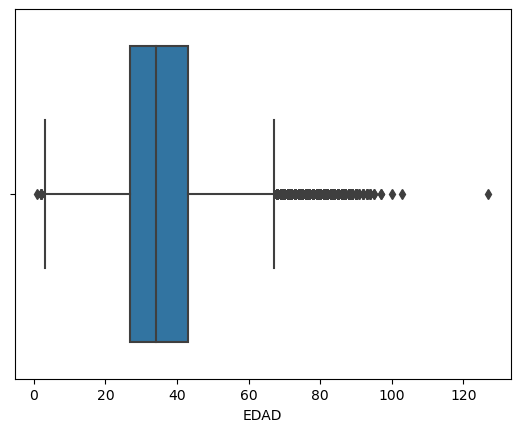

In [7]:
ax=sns.boxplot(x='EDAD', data=bd)

###### 3) 2.B: CÁLCULO ANALÍTICO (puede ser también con la función describe())

In [8]:
Q1=bd['EDAD'].quantile(0.25)
print('Primer cuartil', Q1)

Q3=bd['EDAD'].quantile(0.75)
print('Tercer cuartil', Q3)

IQR=Q3-Q1
print('Rango intercuartil', IQR)

mediana=bd['EDAD'].median()
print('mediana', mediana)

valor_min=bd['EDAD'].min()
print('Valor mínimo', valor_min)

valor_max=bd['EDAD'].max()
print('Valor máximo', valor_max)

Valor_BI=(Q1-1.5*IQR)
print('Valor_BI', Valor_BI)

Valor_BS=(Q3+1.5*IQR)
print('Valor_BS', Valor_BS)

Primer cuartil 27.0
Tercer cuartil 43.0
Rango intercuartil 16.0
mediana 34.0
Valor mínimo 1.0
Valor máximo 127.0
Valor_BI 3.0
Valor_BS 67.0


###### 3) 2.C: ELIMINACIÓN DE OUTLIERS
Con esta función, se detecta el outlier y se intercambia con el valor de la media.

In [9]:
def clean_age(age):
    if age>=Valor_BI and age<=Valor_BS:
        return age
    else:
            return mediana
bd['age_clean'] = bd['EDAD'].apply(clean_age)

# Check out the new column and make sure it looks right

print("'EDADES'")
print("Valor mínimo: ", bd["age_clean"].min())
print("Valor máximo: ", bd["age_clean"].max())

'EDADES'
Valor mínimo:  3.0
Valor máximo:  67.0


###### 3) 2.D: VISUALIZACIÓM DE DATOS SIN ULIERS

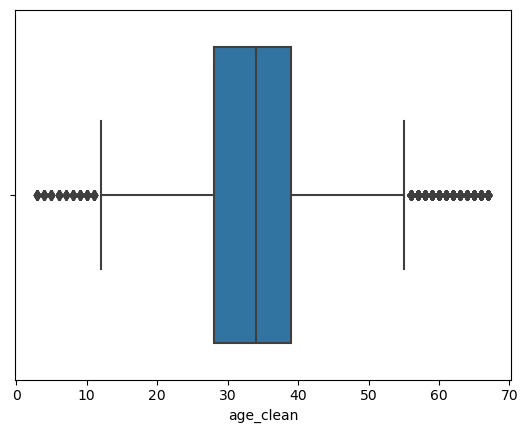

In [10]:
ax=sns.boxplot(x='age_clean', data=bd)

##### 3) 3. LIMPIEZA DE VALORES NaN. REEMPLAZO DE NaN POR MEDIA

In [11]:
bd['age_clean'].fillna(value=mediana, inplace=True)
bd.head(10)

,FECHA,PROVINCIA,GENERO_PERSONA_SIT_VIOLENCIA,EDAD,PAIS_NACIMIENTO,TIPO_VIOLENCIA_FISICA,TIPO_VIOLENCIA_PSICOLOGICA,TIPO_VIOLENCIA_SEXUAL,TIPO_VIOLENCIA_ECONOMICA,TIPO_VIOLENCIA_SIMBOLICA,...,TIPO_VIOLENCIA_INSTITUCIONAL,TIPO_VIOLENCIA_LABORAL,TIPO_VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA,TIPO_VIOLENCIA_OBSTETRICA,TIPO_VIOLENCIA_MEDIATICA,TIPO_VIOLENCIA_OTRAS,VINCULO_PERSONA_AGRESORA,GENERO_AGRESOR,CASO,age_clean
0,2020-01-01,Tucumán,Mujer,NaN,NaN,1,1,0,0,0,...,0,0,0,0,0,0,Pareja,Varon,1,34.0
1,2020-01-01,Buenos Aires,Mujer,39.0,NaN,1,1,0,0,0,...,0,0,0,0,0,0,Ex pareja,Varon,1,39.0
2,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,1,1,0,0,0,...,0,0,0,0,0,0,Ex pareja,Varon,1,22.0
3,2020-01-01,Buenos Aires,Mujer,53.0,NaN,0,1,0,0,0,...,0,0,0,0,0,0,Pareja,Varon,1,53.0
4,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,1,1,0,0,0,...,0,0,0,0,0,0,Pareja,Varon,1,38.0
5,2020-01-01,Buenos Aires,Mujer,23.0,Argentina,1,1,0,1,0,...,0,0,0,0,0,0,Ex pareja,Varon,1,23.0
6,2020-01-01,Santiago Del Estero,Mujer,25.0,Paraguaya,1,1,0,1,0,...,0,0,0,0,0,0,Pareja,Varon,1,25.0
7,2020-01-01,Santa Fe,Mujer,24.0,Argentina,1,1,0,0,0,...,0,0,0,0,0,0,Ex pareja,Varon,1,24.0
8,2020-01-01,Santa Fe,Mujer,NaN,Argentina,1,1,0,1,0,...,0,0,0,0,0,0,Pareja,Varon,1,34.0
9,2020-01-01,San Juan,Mujer,21.0,Argentina,1,1,0,1,0,...,0,0,0,0,0,0,Pareja,Varon,1,21.0


## 4) VISUALIZACIÓN DE LOS DATOS Y BÚSQUEDA DE PATRONES
##### 4) 1. VISUALIZACIÓN DE LA VARIACIÓN DE CANT DE CASOS EN EL TIEMPO
###### 4) 1.A: PARA FACILITAR EL ANÁLISIS AGRUPAMOS LAS FECHAS DE MANERA MENSUAL (no diaria)

In [12]:
bd['FECHA'] = pd.to_datetime(bd['FECHA'], errors='coerce')
bd['FECHA_MES']=bd.FECHA.dt.to_period('M')
bd3=bd.groupby('FECHA_MES', as_index=False).sum()
bd3.head()

C:\Users\garro\AppData\Local\Temp\ipykernel_10940\3724945986.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bd3=bd.groupby('FECHA_MES', as_index=False).sum()


,FECHA_MES,EDAD,TIPO_VIOLENCIA_FISICA,TIPO_VIOLENCIA_PSICOLOGICA,TIPO_VIOLENCIA_SEXUAL,TIPO_VIOLENCIA_ECONOMICA,TIPO_VIOLENCIA_SIMBOLICA,TIPO_VIOLENCIA_DOMESTICA,TIPO_VIOLENCIA_INSTITUCIONAL,TIPO_VIOLENCIA_LABORAL,TIPO_VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA,TIPO_VIOLENCIA_OBSTETRICA,TIPO_VIOLENCIA_MEDIATICA,TIPO_VIOLENCIA_OTRAS,CASO,age_clean
0,2020-01,74549.0,1760,2377,340,901,1028,2159,47,30,10,1,6,4,2465,84597.0
1,2020-02,60166.0,1384,1916,281,748,805,1723,44,22,8,1,1,2,1993,68155.0
2,2020-03,72802.0,1741,2430,287,852,963,2214,27,25,8,4,6,1,2550,87665.0
3,2020-04,84145.0,1973,2911,326,994,919,2694,40,24,6,2,1,1,2996,103931.0
4,2020-05,80617.0,1863,2732,324,1047,857,2623,44,33,9,10,10,3,2875,100033.0


In [13]:
bd3['FECHA_MES'] = bd3['FECHA_MES'].astype('str')

###### 4) 1.B: REALIZAMOS UN GRÁFICO DE LINEAS

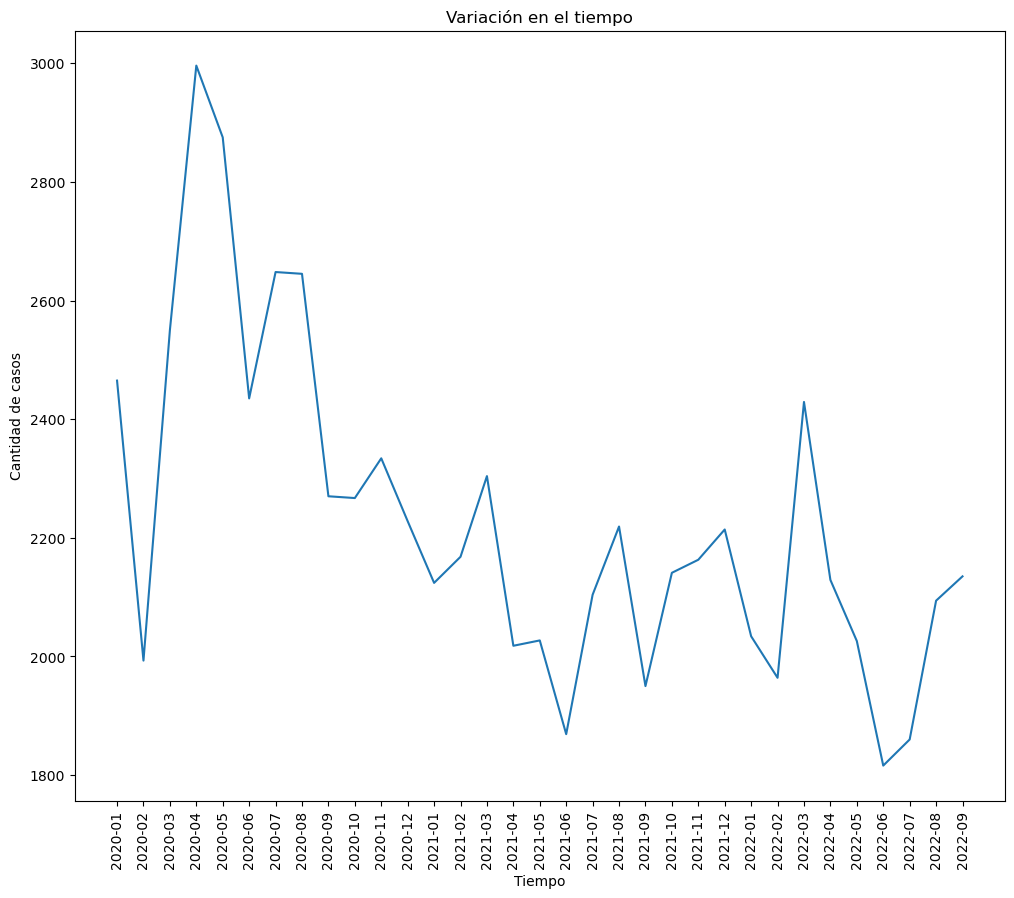

In [14]:
plt.figure(figsize=(12,10))
plt.plot(bd3.FECHA_MES, bd3.CASO)
plt.xticks(rotation = 'vertical')
plt.ylabel('Cantidad de casos')
plt.title('Variación en el tiempo')
plt.xlabel('Tiempo')
plt.show()

##### 4) 3. REALIZAMOS UN HISTOGRAMA EN EL QUE PODAMOS ANALIZAR LA DISTRIBUCIÓN DE LAS EDADES EN CADA PROVINCIA

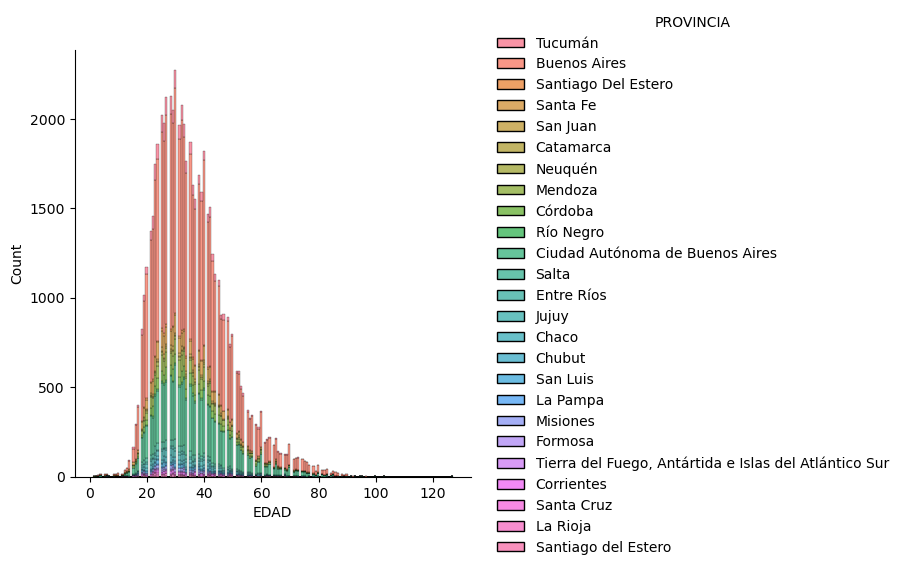

In [15]:
sns.displot(data=bd, x="EDAD", hue="PROVINCIA", multiple="stack")

##### 4) 4. GRÁFICAMOS CANTIDAD DE CASOS POR PROVINCIA:
###### 4) 4.A: CALCULAMOS LA CANTIDAD DE CASOS TOTALES POR PROVINCIA

In [16]:
serie_provincia=bd.PROVINCIA.value_counts()
serie_provincia

Buenos Aires                                             40490
Ciudad Autónoma de Buenos Aires                          14270
Santa Fe                                                  2965
Tucumán                                                   2585
Mendoza                                                   2570
Córdoba                                                   2010
Jujuy                                                     1031
Salta                                                     1019
Chaco                                                      611
San Juan                                                   522
San Luis                                                   521
Entre Ríos                                                 491
Neuquén                                                    474
Misiones                                                   416
Corrientes                                                 402
Río Negro                                              

###### 4) 4.B: GRAFICAMOS

Text(0.5, 0, 'Cantidad de casos')

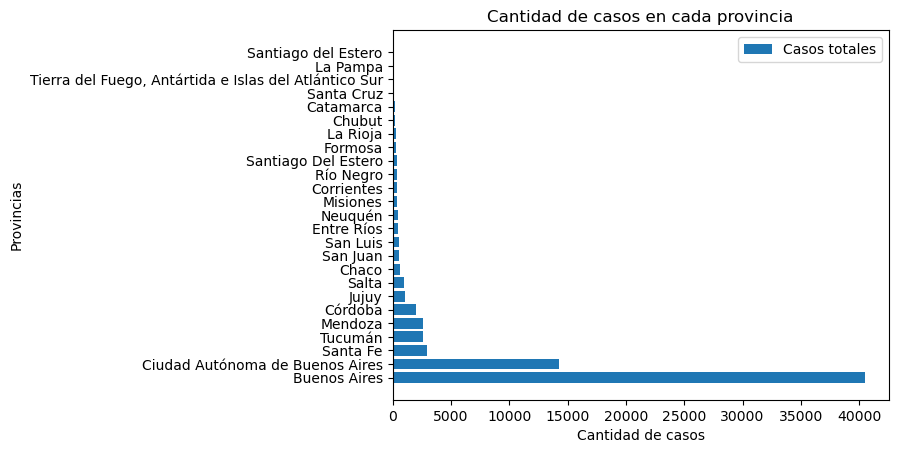

In [17]:
fig, ax= plt.subplots()
ax.barh(serie_provincia.index, serie_provincia, label='Casos totales')
ax.legend(loc='upper right')
ax.set_title('Cantidad de casos en cada provincia')
ax.set_ylabel('Provincias')
ax.set_xlabel('Cantidad de casos')

###### 4) 4.C: PARA MEJORAR LA VISUALIZACIÓN PODEMOS REALIZAR UNA CATEGORIZACION DE LAS PROVINCIAS EN REGIONES

In [18]:
# REALIZAMOS UNA COPIA DE LA COLUMNA PROVINCIA PARA PRESERVAR LOS DATOS ORIGNALES.
bd['REGION'] = bd['PROVINCIA']

# EN LA NUEVA COLUMNA ASIGNAMOS UNA NUEVA CATEGORIA
PAMPEANA = ['Ciudad Autónoma de Buenos Aires', 'Buenos Aires', 'Córdoba', 'Entre Ríos', 'La Pampa','Santa Fe']
NOA = ['Catamarca', 'Jujuy', 'La Rioja', 'Salta', 'Santiago del Estero', 'Santiago Del Estero', 'Tucumán']
NEA = ['Corrientes', 'Chaco', 'Formosa', 'Misiones'] 
CUYO = ['Mendoza', 'San Luis', 'San Juan']
PATAGONIA = ['Chubut', 'Neuquén', 'Río Negro', 'Santa Cruz', 'Tierra del Fuego, Antártida e Islas del Atlántico Sur']

bd['REGION'] = bd['REGION'].apply(lambda x:"PAMPEANA" if x in PAMPEANA else x)
bd['REGION'] = bd['REGION'].apply(lambda x:"NOA" if x in NOA else x)
bd['REGION'] = bd['REGION'].apply(lambda x:"NEA" if x in NEA else x)
bd['REGION'] = bd['REGION'].apply(lambda x:"CUYO" if x in CUYO else x)
bd['REGION'] = bd['REGION'].apply(lambda x:"PATAGONIA" if x in PATAGONIA else x)

# CREAMOS UNA SERIE DE LAS REGIONAS CONTANDO LOS CASOS
serie_regiones=bd.REGION.value_counts()
serie_regiones

print(serie_regiones)

PAMPEANA     60295
NOA           5545
CUYO          3613
NEA           1712
PATAGONIA     1257
Name: REGION, dtype: int64


###### 4) 4.D: GRAFICAMOS

Text(0.5, 0, 'Regiones')

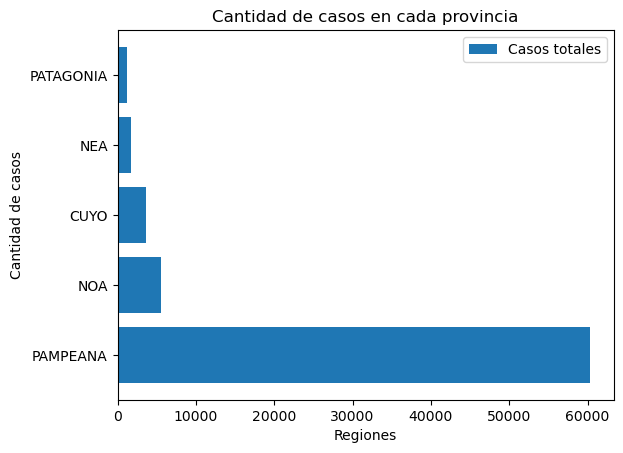

In [19]:
fig, ax= plt.subplots()
ax.barh(serie_regiones.index, serie_regiones, label='Casos totales')
ax.legend(loc='upper right')
ax.set_title('Cantidad de casos en cada provincia')
ax.set_ylabel('Cantidad de casos')
ax.set_xlabel('Regiones')

##### 4) 5. REALIZAMOS UNA ESTADICTICA DE EDADES POR PROVINCIA

Text(0, 0.5, 'Edad')

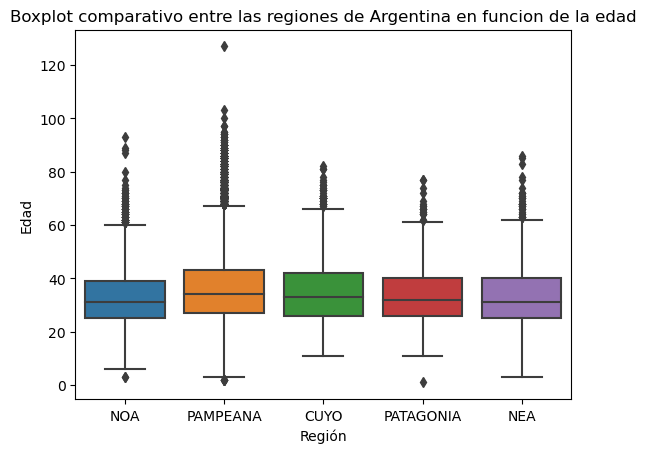

In [20]:
sns.boxplot(x=bd.REGION, y= bd.EDAD)
plt.title('Boxplot comparativo entre las regiones de Argentina en funcion de la edad')
plt.xlabel('Región')
plt.ylabel('Edad')

Por lo tanto, gracias a estos gráficos podemos realizar las primeras conclusiones:

* la mayor cantidad de casos se da en casos con victimas de un rango de edad de entre 27-43 años, siendo la edad en la que se concentra el 50% de los casos a los 34 años
* la provincia con mayor cantidad de casos es Buenos Aires, mientras que la de menor cantidad es La Pampa

AVISO IMPORTANTE! PARA UNA MAYOR CARACTERIZACIÓN DE LOS DATOS DEBEMOS REALIZAR UNA NORMALIZACIÓN DE ESTOS. A partir de dividir esta cantidad de casos por provincia por su respectiva cantidad de habitantes (queda pendiente para la proxima entrega)

In [21]:
model1 = 'EDAD~REGION'
lm1   = sm.ols(formula = model1, data = bd).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                   EDAD   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     84.43
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           1.26e-71
Time:                        06:23:53   Log-Likelihood:            -2.3247e+05
No. Observations:               58764   AIC:                         4.650e+05
Df Residuals:                   58759   BIC:                         4.650e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              35.1155    

##### 4) 6. ANALIZAMOS EL VINCULO DEL AGRESOR CON LA VICTIMA
###### 4) 6.A: REALIZAMOS UN RECUENTO DE CASOS POR AGRESOR

In [22]:
vinculo=bd.groupby('VINCULO_PERSONA_AGRESORA')
cant=bd.groupby(bd.VINCULO_PERSONA_AGRESORA)['CASO'].count()
cant

VINCULO_PERSONA_AGRESORA
Ex pareja              34517
Madre o tutor            130
Otro                    5507
Otro familiar           2857
Padre o tutor            898
Pareja                 26590
Superior jerarquico      322
Name: CASO, dtype: int64

###### 4) 6.B: REALIZAMOS UN GRÁFICO DE TORTA PARA VISUALIZACIÓN DE DATOS

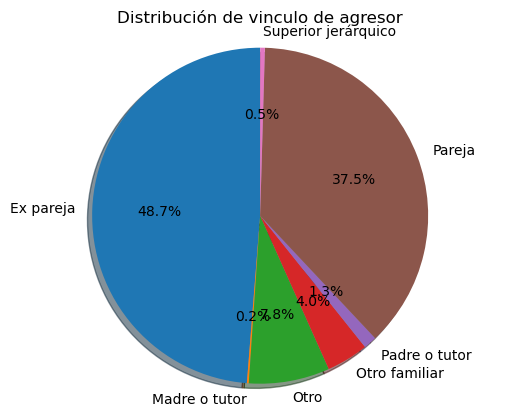

In [23]:
fig1, ax1 = plt.subplots()
#Creamos el grafico, añadiendo los valores
vinculo=['Ex pareja', 'Madre o tutor', 'Otro', 'Otro familiar', 'Padre o tutor', 'Pareja', 'Superior jerárquico']
ax1.pie(cant, labels=vinculo, autopct='%1.1f%%', shadow=True, startangle=90)
#señalamos la forma, en este caso 'equal' es para dar forma circular
ax1.axis('equal')
plt.title('Distribución de vinculo de agresor')
#plt.legend()
plt.savefig('grafica_pastel.png')
plt.show()

###### 4) 6.C: REALIZAMOS HISTOGRAMA QUE ANALICE EL VINCULO DEL AGRESOR EN FUNCIÓN A LA EDAD DE LA VICTIMA
ESTO PERMITIRA CONOCER PARA CUALES SON LAS EDADES MAS VULNERABLES PARA CADA TIPO DE ÄGRESOR

<Figure size 640x480 with 0 Axes>

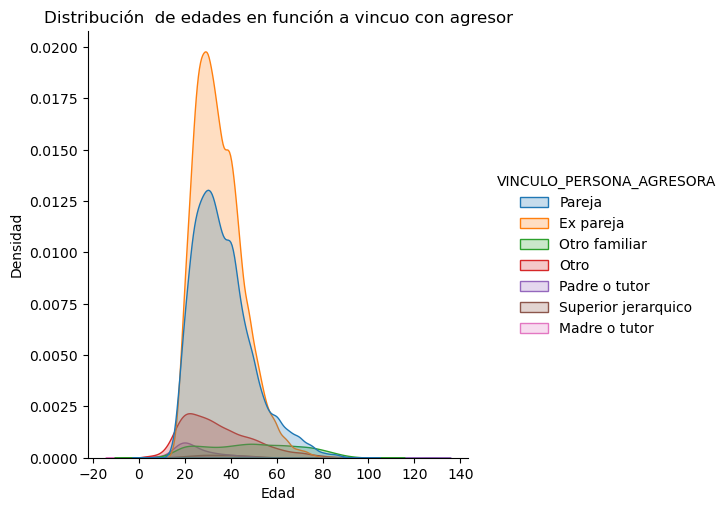

In [24]:
plt.figure()
# Figure -level
ax = sns.displot(data=bd, x='EDAD', kind='kde', hue='VINCULO_PERSONA_AGRESORA', fill=True)
ax.set(xlabel='Edad', ylabel='Densidad', title='Distribución  de edades en función a vincuo con agresor')


###### 4) 6.D: GRAFICAMOS BOXPLOT PARA ANLIZAR LAS EDADES

Text(0, 0.5, 'Edad')

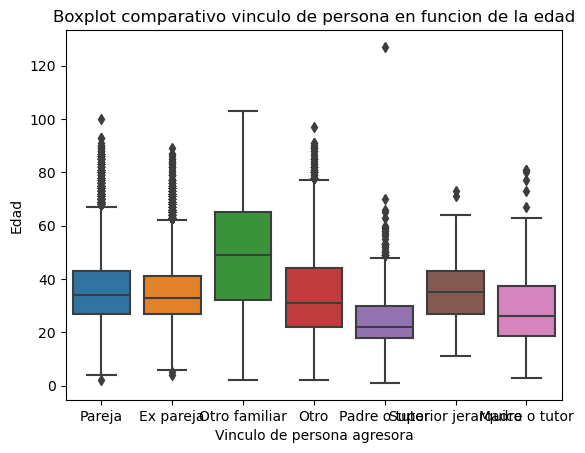

In [25]:
sns.boxplot(x=bd.VINCULO_PERSONA_AGRESORA, y= bd.EDAD)
plt.title('Boxplot comparativo vinculo de persona en funcion de la edad')
plt.xlabel('Vinculo de persona agresora')
plt.ylabel('Edad')

In [26]:
model2 = 'EDAD~VINCULO_PERSONA_AGRESORA'
lm1   = sm.ols(formula = model2, data = bd).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                   EDAD   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     645.7
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        06:23:55   Log-Likelihood:            -2.2751e+05
No. Observations:               57917   AIC:                         4.550e+05
Df Residuals:                   57910   BIC:                         4.551e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

## 5) FEATURE SELECTION
### 5) 1. METODO DE FILTRO
Como primer instancia usaremos el método de filtro para tener una idea general de que variables son las más importantes. 

Para iniciar podemos verificar todas las corelaciones posibles a partir de instalar la libreria "Pandas_profiling" que permite generar un reporte del DataFrame.

In [27]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
import pandas_profiling

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


C:\Users\garro\AppData\Local\Temp\ipykernel_10940\1963573057.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [28]:
profile = pandas_profiling.ProfileReport(bd)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Por lo tanto, como nuestro objetivo es predecir la cantidad de casos y el tipo de violencia, debemos hacer una limpieza de ciertas variabes. Donde, nos quedaremos con los tipos de violencia, el vínculo del agresor con la victima y la nueva columna generada de las edades sin outliers y NaN (age_clean).

##### 5)1.A. VARIABLES NUMERICAS

In [29]:
bd2=bd.drop(['FECHA','PROVINCIA','PAIS_NACIMIENTO', 'GENERO_PERSONA_SIT_VIOLENCIA','GENERO_AGRESOR', 'EDAD', 'REGION','FECHA_MES', 'CASO'], axis = 1) 
bd2

,TIPO_VIOLENCIA_FISICA,TIPO_VIOLENCIA_PSICOLOGICA,TIPO_VIOLENCIA_SEXUAL,TIPO_VIOLENCIA_ECONOMICA,TIPO_VIOLENCIA_SIMBOLICA,TIPO_VIOLENCIA_DOMESTICA,TIPO_VIOLENCIA_INSTITUCIONAL,TIPO_VIOLENCIA_LABORAL,TIPO_VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA,TIPO_VIOLENCIA_OBSTETRICA,TIPO_VIOLENCIA_MEDIATICA,TIPO_VIOLENCIA_OTRAS,VINCULO_PERSONA_AGRESORA,age_clean
0,1,1,0,0,0,1,0,0,0,0,0,0,Pareja,34.0
1,1,1,0,0,0,1,0,0,0,0,0,0,Ex pareja,39.0
2,1,1,0,0,0,1,0,0,0,0,0,0,Ex pareja,22.0
3,0,1,0,0,0,1,0,0,0,0,0,0,Pareja,53.0
4,1,1,0,0,0,1,0,0,0,0,0,0,Pareja,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73489,1,1,1,0,0,1,0,0,0,0,0,0,Pareja,53.0
73490,1,1,0,0,0,1,0,0,0,0,0,0,Pareja,34.0
73491,0,1,1,0,1,1,0,0,0,0,0,0,Ex pareja,52.0
73492,0,1,0,0,0,1,0,0,0,0,0,0,Pareja,34.0


In [30]:
bd3=pd.get_dummies(bd2, columns=['VINCULO_PERSONA_AGRESORA'])
bd3

,TIPO_VIOLENCIA_FISICA,TIPO_VIOLENCIA_PSICOLOGICA,TIPO_VIOLENCIA_SEXUAL,TIPO_VIOLENCIA_ECONOMICA,TIPO_VIOLENCIA_SIMBOLICA,TIPO_VIOLENCIA_DOMESTICA,TIPO_VIOLENCIA_INSTITUCIONAL,TIPO_VIOLENCIA_LABORAL,TIPO_VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA,TIPO_VIOLENCIA_OBSTETRICA,TIPO_VIOLENCIA_MEDIATICA,TIPO_VIOLENCIA_OTRAS,age_clean,VINCULO_PERSONA_AGRESORA_Ex pareja,VINCULO_PERSONA_AGRESORA_Madre o tutor,VINCULO_PERSONA_AGRESORA_Otro,VINCULO_PERSONA_AGRESORA_Otro familiar,VINCULO_PERSONA_AGRESORA_Padre o tutor,VINCULO_PERSONA_AGRESORA_Pareja,VINCULO_PERSONA_AGRESORA_Superior jerarquico
0,1,1,0,0,0,1,0,0,0,0,0,0,34.0,0,0,0,0,0,1,0
1,1,1,0,0,0,1,0,0,0,0,0,0,39.0,1,0,0,0,0,0,0
2,1,1,0,0,0,1,0,0,0,0,0,0,22.0,1,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,0,0,53.0,0,0,0,0,0,1,0
4,1,1,0,0,0,1,0,0,0,0,0,0,38.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73489,1,1,1,0,0,1,0,0,0,0,0,0,53.0,0,0,0,0,0,1,0
73490,1,1,0,0,0,1,0,0,0,0,0,0,34.0,0,0,0,0,0,1,0
73491,0,1,1,0,1,1,0,0,0,0,0,0,52.0,1,0,0,0,0,0,0
73492,0,1,0,0,0,1,0,0,0,0,0,0,34.0,0,0,0,0,0,1,0


In [31]:
correlacion=bd3.corr()
correlacion

,TIPO_VIOLENCIA_FISICA,TIPO_VIOLENCIA_PSICOLOGICA,TIPO_VIOLENCIA_SEXUAL,TIPO_VIOLENCIA_ECONOMICA,TIPO_VIOLENCIA_SIMBOLICA,TIPO_VIOLENCIA_DOMESTICA,TIPO_VIOLENCIA_INSTITUCIONAL,TIPO_VIOLENCIA_LABORAL,TIPO_VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA,TIPO_VIOLENCIA_OBSTETRICA,TIPO_VIOLENCIA_MEDIATICA,TIPO_VIOLENCIA_OTRAS,age_clean,VINCULO_PERSONA_AGRESORA_Ex pareja,VINCULO_PERSONA_AGRESORA_Madre o tutor,VINCULO_PERSONA_AGRESORA_Otro,VINCULO_PERSONA_AGRESORA_Otro familiar,VINCULO_PERSONA_AGRESORA_Padre o tutor,VINCULO_PERSONA_AGRESORA_Pareja,VINCULO_PERSONA_AGRESORA_Superior jerarquico
TIPO_VIOLENCIA_FISICA,1.000000,0.134726,0.033825,0.065005,-0.022658,0.236244,-0.000235,-0.104471,0.025306,-0.027005,-0.020863,-0.138656,-0.089061,0.019032,-0.003703,-0.196052,-0.028596,-0.007036,0.152697,-0.054547
TIPO_VIOLENCIA_PSICOLOGICA,0.134726,1.000000,-0.105971,0.084362,0.080601,0.239510,-0.009290,-0.013764,0.009713,-0.020251,-0.016823,-0.156925,0.055287,0.090497,-0.000588,-0.176632,-0.005746,-0.026740,0.074062,-0.004362
TIPO_VIOLENCIA_SEXUAL,0.033825,-0.105971,1.000000,0.017193,0.056635,-0.167882,0.041717,0.070778,0.096187,-0.001079,0.007930,0.138212,-0.073865,-0.063830,0.000429,0.233779,-0.005486,0.062267,-0.070773,0.063630
TIPO_VIOLENCIA_ECONOMICA,0.065005,0.084362,0.017193,1.000000,0.067771,0.165223,-0.000279,-0.050794,0.035116,-0.023054,-0.013435,-0.107484,0.069201,0.136706,-0.013151,-0.184057,-0.050218,-0.043609,0.015765,-0.023779
TIPO_VIOLENCIA_SIMBOLICA,-0.022658,0.080601,0.056635,0.067771,1.000000,-0.004504,0.031726,0.012190,0.058547,-0.003468,0.014762,-0.024306,0.049860,-0.000883,0.012191,-0.004368,0.086250,0.012526,-0.005865,0.020269
TIPO_VIOLENCIA_DOMESTICA,0.236244,0.239510,-0.167882,0.165223,-0.004504,1.000000,-0.113587,-0.346251,0.003172,-0.097906,-0.051312,-0.431495,0.023605,0.221414,0.008859,-0.604575,0.000536,0.003909,0.190792,-0.202694
TIPO_VIOLENCIA_INSTITUCIONAL,-0.000235,-0.009290,0.041717,-0.000279,0.031726,-0.113587,1.000000,0.056188,0.021799,0.076693,0.010297,-0.014316,0.000881,-0.016181,-0.000011,0.100719,-0.000025,0.001162,-0.045719,0.073636
TIPO_VIOLENCIA_LABORAL,-0.104471,-0.013764,0.070778,-0.050794,0.012190,-0.346251,0.056188,1.000000,-0.002404,0.003798,0.006638,0.002447,0.027728,-0.099444,-0.004924,0.243492,-0.022304,-0.010863,-0.084391,0.477853
TIPO_VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA,0.025306,0.009713,0.096187,0.035116,0.058547,0.003172,0.021799,-0.002404,1.000000,0.030608,0.006686,-0.009978,-0.021071,0.008574,0.002110,-0.009490,-0.008012,0.001998,0.002787,-0.001281
TIPO_VIOLENCIA_OBSTETRICA,-0.027005,-0.020251,-0.001079,-0.023054,-0.003468,-0.097906,0.076693,0.003798,0.030608,1.000000,0.016681,-0.001806,-0.014289,-0.027942,-0.001327,0.092745,-0.006341,-0.003507,-0.023741,-0.002092


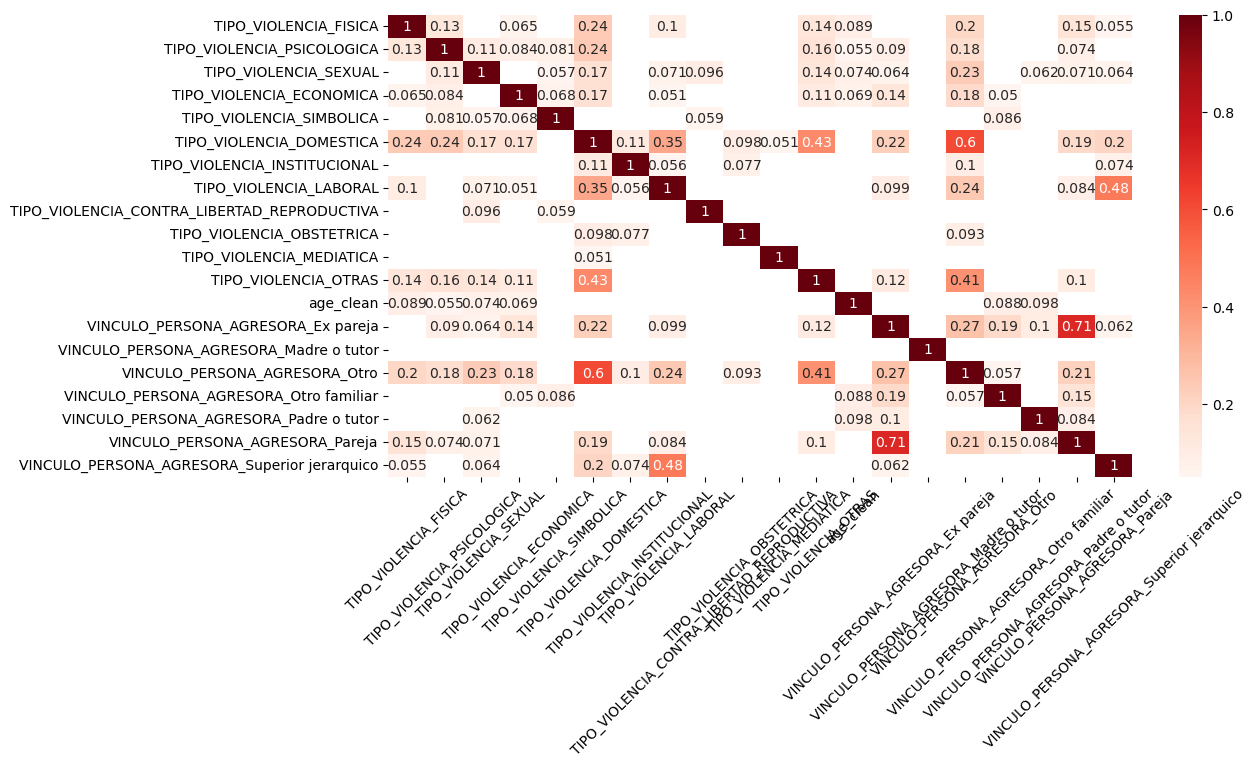

In [32]:
cortarget=abs(correlacion)
relevantfeatures= cortarget[cortarget>=0.05]
plt.figure(figsize=(12, 6))
heatmap=sns.heatmap(cortarget[abs(correlacion)>=0.05][[x for x in relevantfeatures.index]], annot=True, cmap=plt.cm.Reds)
plt.xticks(rotation=45) 
plt.show()

Como podemos observar que no existe una gran correlación entre los tipos de violencia y el vinculo de la víctima con el agrsor.  

##### 5)1.B: VARIABLES CATEGORICAS

In [33]:
serie_contingencia=pd.crosstab(bd.VINCULO_PERSONA_AGRESORA, bd.age_clean)
serie_contingencia

age_clean,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,...,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0
VINCULO_PERSONA_AGRESORA,,,,,,,,,,,,,,,,,,,,,
Ex pareja,0,1,1,1,2,0,0,2,0,0,...,117,107,107,58,63,64,50,50,37,21
Madre o tutor,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
Otro,5,7,6,9,2,7,9,10,9,27,...,24,28,38,23,13,26,16,27,12,14
Otro familiar,0,1,1,0,0,0,2,3,1,3,...,34,33,47,27,34,48,32,39,36,24
Padre o tutor,3,4,6,4,0,7,3,2,4,3,...,2,3,1,0,0,1,0,1,1,0
Pareja,0,1,0,0,0,0,1,0,1,1,...,115,101,169,89,98,80,75,99,57,72
Superior jerarquico,0,0,0,0,0,0,0,0,1,0,...,1,0,4,1,0,0,1,0,0,0


Por lo tanto, al no existir una gran correlación entre las variables decidimos disminuir la dimensionalidad seleccionando las varibales que consideramos más relevantes para el análisis:

1. age_clean (edad de la víctima)
2. VINCULO_PERSONA_AGRESORA: el vinculo que tiene la vinctima con la persona agresora ("pareja", ëx pareja". "padre o tutor", "madre o tutor", "otro famiiar", "superior jerárquico", "otro")
3. todas las columnas pertenecientes a los tipos de violencia ('TIPO_VIOLENCIA_FISICA', 'TIPO_VIOLENCIA_PSICOLOGICA', 'TIPO_VIOLENCIA_SEXUAL' , 'TIPO_VIOLENCIA_ECONOMICA', 'TIPO_VIOLENCIA_SIMBOLICA', 'TIPO_VIOLENCIA_DOMESTICA',	'TIPO_VIOLENCIA_INSTITUCIONAL', 'TIPO_VIOLENCIA_LABORAL', 'TIPO_VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA', 'TIPO_VIOLENCIA_OBSTETRICA', 'TIPO_VIOLENCIA_MEDIATICA',  'TIPO_VIOLENCIA_OTRAS')

### 5) 2. METODO DE ENVOLTURA  (Forward Selection)
Ahora usaremos el forward selection. Debido a su complejidad, será con el que que nos quedaremos con los resultados.

##### 5) 2.1. AISLAMOS LAS VARIABLES DE INTERES Y LAS INDEPENDIENTES

In [34]:
y = bd3['TIPO_VIOLENCIA_FISICA']
X = bd3.drop('TIPO_VIOLENCIA_FISICA', axis=1)

##### 5) 2.2. REALIZAMOS EL PRIMER SPRINT
En este sprint se seleccionaran 5 features.

In [35]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs1 = SFS(LinearRegression(),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [36]:
sfs1.fit(X, y)
sfs1.k_feature_names_  

('TIPO_VIOLENCIA_SEXUAL',
 'TIPO_VIOLENCIA_DOMESTICA',
 'age_clean',
 'VINCULO_PERSONA_AGRESORA_Ex pareja',
 'VINCULO_PERSONA_AGRESORA_Pareja')

##### 5) 2.3. REALIZAMOS EL SEGUNDO SPRINT
En este sprint se seleccionaran 8 features.

In [37]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs2 = SFS(LinearRegression(),
          k_features=8,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [38]:
sfs2.fit(X, y)
sfs2.k_feature_names_ 

('TIPO_VIOLENCIA_PSICOLOGICA',
 'TIPO_VIOLENCIA_SEXUAL',
 'TIPO_VIOLENCIA_DOMESTICA',
 'TIPO_VIOLENCIA_OTRAS',
 'age_clean',
 'VINCULO_PERSONA_AGRESORA_Ex pareja',
 'VINCULO_PERSONA_AGRESORA_Otro familiar',
 'VINCULO_PERSONA_AGRESORA_Pareja')

## 6) MODELAMIENTO
### 6) 1. ARBOL DE DECISION
Son estructuras matemáticas (diagramas de flujo) que utilizan criterios de teoría de la información como la impureza para hacer segmentaciones


###### 6)1.1. IMPORTAMOS LIBRERIAS

In [47]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

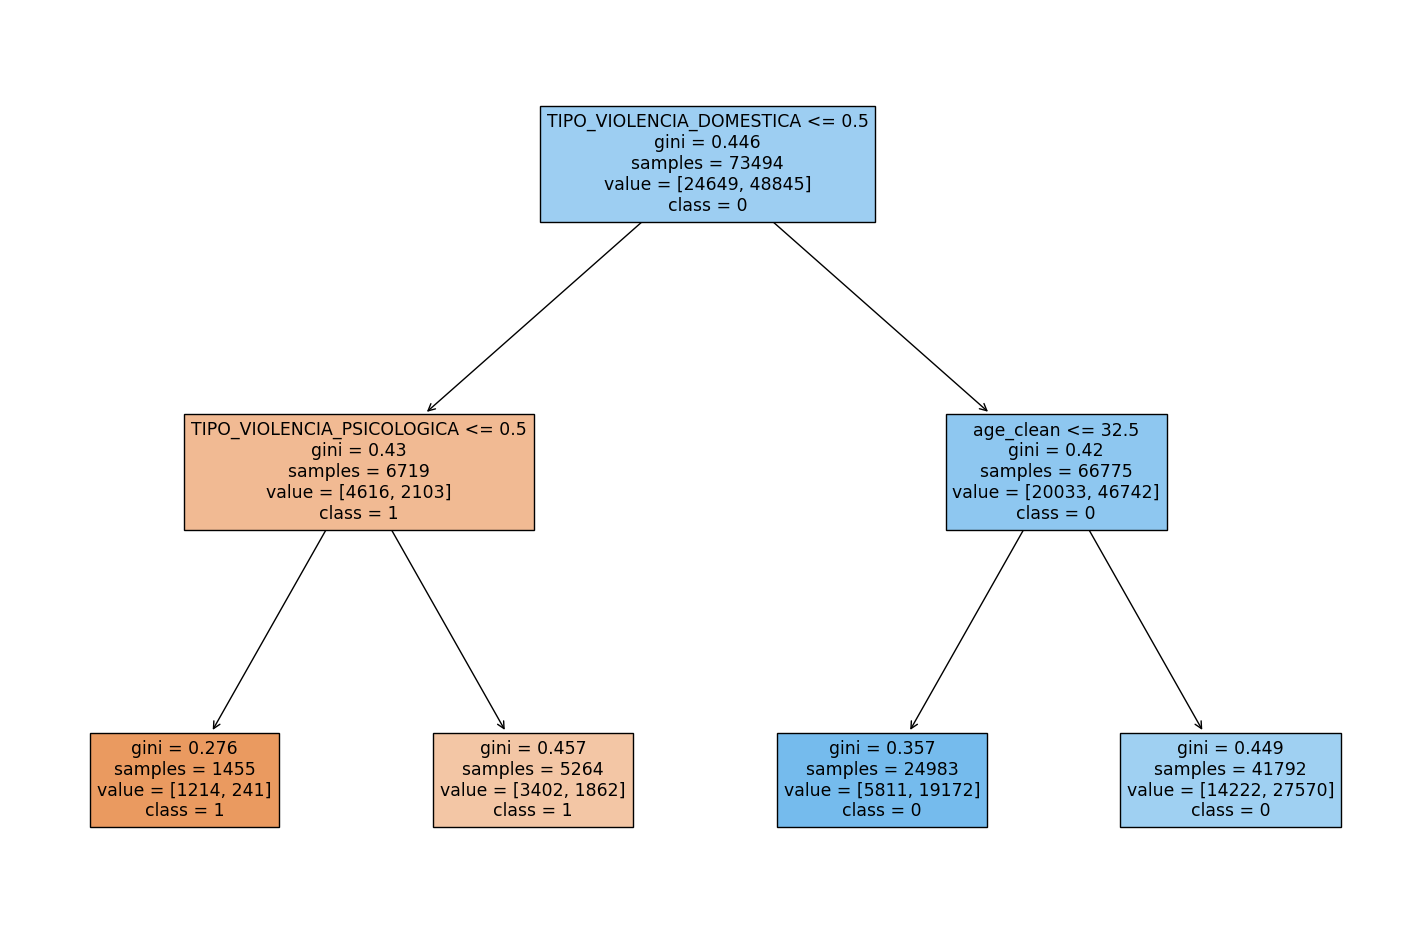

In [58]:
## y = bd3['TIPO_VIOLENCIA_FISICA']
X = bd3.drop('TIPO_VIOLENCIA_FISICA', axis=1)

# ajustar arbol de decisión simple con hiperparametros (defecto)
clf = DecisionTreeClassifier(random_state=1234, max_depth=2)
model = clf.fit(X, y)
# Graficando
fig = plt.figure(figsize=(18,12))
_ = tree.plot_tree(clf,feature_names=X.columns,  
                   class_names=y.unique().astype('str'),
                   filled=True)

### 6) 2. LINEAR REGRESSION

##### 6) 2. 1. PRIMER SPRINT
Aplicamos el modelo de regresión lineal para predecir el tipo de violencia con las cinco variables seleccionadas en el primer sprint. 

###### 6)2. 1. A. SPLIT DATA AND DATA TRAIN

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[list(sfs1.k_feature_names_)], y, test_size=0.30, random_state=42) 

###### 6)2.1.B. AJUSTE DEL MODELO

In [41]:
#ajuste de una regresion lineal utilizando statsmodels 
import statsmodels.api as sm 
#Variables utilizar para nuestra regresion lo obtenido anteriormente con el facture 
X_1sprint1= X_train

#vamos a tomar una columna de constantes para ajustar nuestro modelo 
x_constante1= sm.add_constant(X_1sprint1)
#genera el modeolo 
li_reg=sm.OLS(y_train, x_constante1).fit()
li_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     TIPO_VIOLENCIA_FISICA   R-squared:                       0.089
Model:                               OLS   Adj. R-squared:                  0.089
Method:                    Least Squares   F-statistic:                     1010.
Date:                   Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                           06:29:37   Log-Likelihood:                -32014.
No. Observations:                  51445   AIC:                         6.404e+04
Df Residuals:                      51439   BIC:                         6.409e+04
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.3909      0.010     39.492      0.000       0.371       0.410
TIPO_VIOLENCIA_SEXUAL                  0.1125      0.006     18.877      0.000       0.101       0.124
TIPO_VIOLENCIA_DOMESTICA               0.2878      0.008     34.885      0.000       0.272       0.304
age_clean                             -0.0044      0.000    -21.521      0.000      -0.005      -0.004
VINCULO_PERSONA_AGRESORA_Ex pareja     0.1393      0.007     21.053      0.000       0.126       0.152
VINCULO_PERSONA_AGRESORA_Pareja        0.2280      0.007     33.400      0.000       0.215       0.241
==============================================================================
Omnibus:                    36862.830   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6729.983
Skew:                          -0.668   Prob(JB):                         0.00
Kurtosis:                       1.835   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### 6) 2. 1. C. METRICAS

In [42]:
from sklearn.metrics import mean_squared_error, r2_score 
Xnuevo1=sm.add_constant(X_test)
pred_test1=li_reg.predict(Xnuevo1)
print('Coeficiente de determinacion')
print('R2 test model', r2_score(y_test, pred_test1))
print("-"*50)
print('Mean squared error')
print('MSE test model', mean_squared_error(y_test, pred_test1))
print("-"*50)

Coeficiente de determinacion
R2 test model 0.0945742597208965
--------------------------------------------------
Mean squared error
MSE test model 0.20114180177418065
--------------------------------------------------


###### 6)2.1.D. CONCLUSIONES
El coeficiente de determinación es bastante bajo, lo cual nos indica que el modelo está muy mal ajustado.

Por otro lado, el error cuadrático medio es un valor único que proporciona información sobre la bondad del ajuste de la línea de regresión. Cuanto menor sea el valor de MSE, mejor será el ajuste, ya que los valores más pequeños implican menores magnitudes de error. Es decir, como es menor a 1, los puntos están bastante proximos a los valores predichos del modelo, lo cual nos va a dar que el modelo predice con buena exactitud.

##### 6) 2.2. SEGUNDO SRINT
Se utilizará un modelo de regresión lineal para predecir los gastos totales con las 8 variables seleccionadas en el segundo sprint
###### 6)2. 2. A. SPLIT DATA AND DATA TRAIN

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[list(sfs2.k_feature_names_)], y, test_size=0.30, random_state=42) 

###### 6)2. 2. B. AJUSTE DEL MODELO

In [45]:
#ajuste de una regresion lineal utilizando statsmodels 
import statsmodels.api as sm 
#Variables utilizar para nuestra regresion lo obtenido anteriormente con el facture 
X_1sprint2= X_train

#vamos a tomar una columna de costantes para ajustar nuestro modelo 
x_constante2= sm.add_constant(X_1sprint2)
#genera el modeolo 
li_reg=sm.OLS(y_train, x_constante2).fit()
li_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     TIPO_VIOLENCIA_FISICA   R-squared:                       0.099
Model:                               OLS   Adj. R-squared:                  0.098
Method:                    Least Squares   F-statistic:                     703.6
Date:                   Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                           06:35:42   Log-Likelihood:                -31753.
No. Observations:                  51445   AIC:                         6.352e+04
Df Residuals:                      51436   BIC:                         6.360e+04
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.2875      0.013     22.727      0.000       0.263       0.312
TIPO_VIOLENCIA_PSICOLOGICA                 0.1627      0.009     17.267      0.000       0.144       0.181
TIPO_VIOLENCIA_SEXUAL                      0.1252      0.006     21.008      0.000       0.114       0.137
TIPO_VIOLENCIA_DOMESTICA                   0.2152      0.009     23.645      0.000       0.197       0.233
TIPO_VIOLENCIA_OTRAS                      -0.1117      0.015     -7.371      0.000      -0.141      -0.082
age_clean                                 -0.0048      0.000    -23.661      0.000      -0.005      -0.004
VINCULO_PERSONA_AGRESORA_Ex pareja         0.1700      0.008     21.923      0.000       0.155       0.185
VINCULO_PERSONA_AGRESORA_Otro familiar     0.1374      0.012     11.195      0.000       0.113       0.161
VINCULO_PERSONA_AGRESORA_Pareja            0.2588      0.008     32.536      0.000       0.243       0.274
==============================================================================
Omnibus:                    29310.156   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6623.405
Skew:                          -0.673   Prob(JB):                         0.00
Kurtosis:                       1.870   Cond. No.                         307.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### 6)2. 2. C. METRICAS

In [46]:
from sklearn.metrics import mean_squared_error, r2_score 
Xnuevo2=sm.add_constant(X_test)
pred_test2=li_reg.predict(Xnuevo2)
print('Coeficiente de determinacion')
print('R2 test model', r2_score(y_test, pred_test2))
print("-"*50)
print('MEan squared error')
print('MSE test model', mean_squared_error(y_test, pred_test2))
print("-"*50)

Coeficiente de determinacion
R2 test model 0.10503964926902642
--------------------------------------------------
MEan squared error
MSE test model 0.1988168984537486
--------------------------------------------------


###### 6)2.2.D. CONCLUSIONES
El coeficiente de determinación continua siendo bastante bajo y se nota una mejoría leve con respecto al del primer sprint con 5 variables, lo cual nos indica que el modelo está mejor ajustado, obviamente que no de manera perfecta pero sí con una mayor eficiencia.

Además, también podemos observar una leve mejoría en el error cuadrático medio, ya que disminuye

#### 6) 3. REGRESION LOGÍSTICA
###### 6)3.1. IMPORTAMOS LIBRERIAS

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


###### 6)3.2. SPLIT DATA AND TRAIN DATA 

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LogisticRegression(max_iter=10000, n_jobs=-1) 

###### 6)3.3. AJUSTE DE MODELO Y PREDICCIONES

In [63]:
# Separacion train/tet
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LogisticRegression(max_iter=10000, n_jobs=-1) 
# Ajustar modelo
model.fit(X_train, y_train) 
#Predicciones
predicciones = model.predict(X_test)
predicciones

print(accuracy_score(y_test, predicciones))

0.702949820398389


###### 6)3.4. REALIZAMOS MATRIZ DE CONFUSION
Esta matriz es una herramienta que permite visualizar el desempeño de un algoritmo  de aprendizaje supervisado. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa a las instancias en la clase real., o sea en términos prácticos nos permite ver  qué tipos de aciertos y errores está teniendo nuestro modelo a la hora de pasar por el proceso de aprendizaje con los datos.

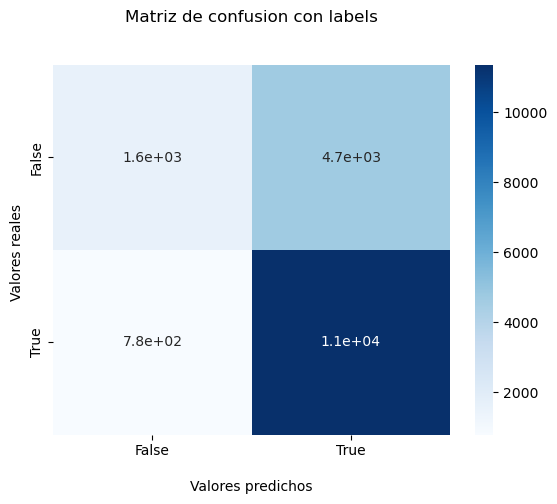

In [64]:
from sklearn.metrics import confusion_matrix
#Matriz de confusion
cf_matrix = confusion_matrix(y_test, predicciones)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

## CONCLUSIONES
Usamos las técnicas de correlación para determinar si existía o no una relaciones entre diferentes variables
en los casos de violencia de género. 
En primer lugar, buscamos determinar la cantidad de casos por provincia y cual es su varianza. Esto nos permite definir
cuales son los rangos de edad más vulnerables y en un futuro, enfatizar las acciones legislativas y de asistencia a 
esas edades. En este caso, observamos que el 50% de los casos se acumulaban entre los 27 (25%) a 43 (75%) años, siendo
el 50% los 34 años.
En segundo lugar, realizamos un gráfico de barras que indicaba la cantidad de casos por provincia. Esto permite darnos 
una idea de cuales son las provincias más vulerables y, por lo tanto, crear una mayor cantidad de centros de asistencia
a la mujer. En este caso, observamos que la provincia con mayor cantidad de casos es Buenos Aires,seguida por la provincia de Santa Fe, mientras que la de menor cantidad de asos es La Pampa. 
Luego, para facilitar la visualización de los datos realizamos una categorización de las provincias en regiones (Pampeana,
NOA, NEA, Cuyo y Patagonia).Además, buscamos identificar la media de las edades de las victimas nn cada región. 
En tercer lugar, determinamos la cantidad de casos en función al vinculo del agresor con la víctima y, cuales son las edades
más afectadas en cada tipo de vínculo. Observamos que las victimas cuyo agresor es un familiar (madre, padre, tutor u ptro
familiar) son entre los 11 a 20 años. Mientras que, aquellas en las que el agresor es la pareja o ex pareja son de entre 18 
a 45 años. 
A partir de estas conclusiones, se recomienda:
- tanto en las provincias de Buenos Aires, Santa Fe, Tucumán, Mendoza y Ciudad de Buenos Aires incrementar la cantidad de centros de ayuda para la mujer
- debido a que la media de casos en la región del NOA y NEA son las regiones con una mayor cantidad de casos en menores, se recomienda la creación de talleres en colegios, para fomentar la comunicación de los alumnos con el cuerpo de profesores cuando exista algún caso de violencia. 

Por último, se hicieron pruebas de tres modelos de regresión que nos permitirán hacer las predicciones a futuros casos de violencia. Siendo el de mejor performance la regresión logística con una exactitud de 70%.